In [21]:
%matplotlib notebook

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

<IPython.core.display.Javascript object>


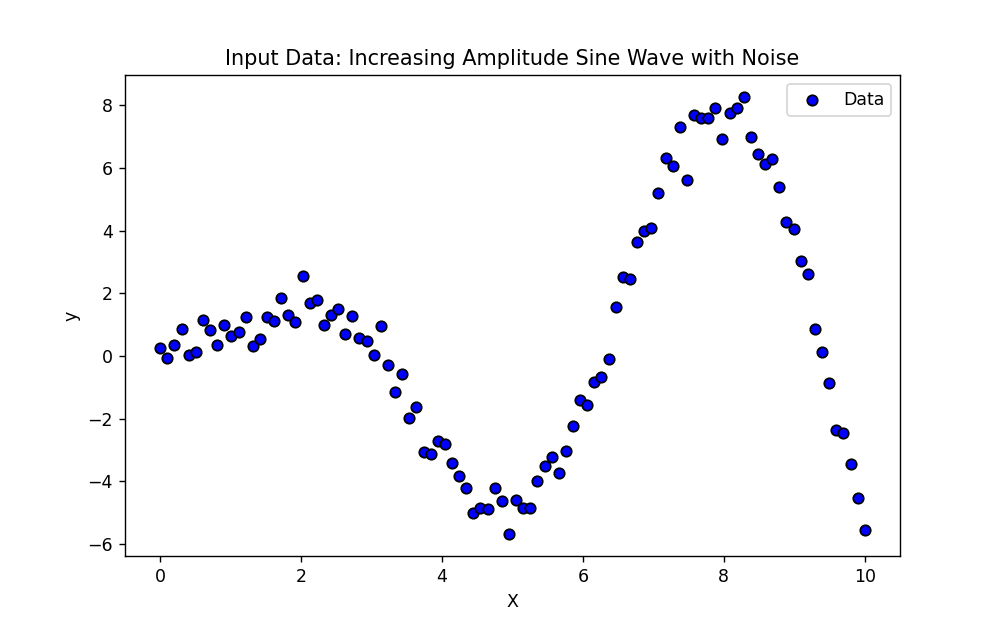

In [26]:
# 1. Generate Data (Increasing Amplitude Sine Wave)
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X) * X + 0.5 * np.random.randn(100, 1)  # Sine wave with increasing amplitude and noise

# Visualize Input Data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label='Data', c='blue', edgecolors='k')
plt.title('Input Data: Increasing Amplitude Sine Wave with Noise')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [24]:
# Locally Weighted Regression (LWR) Function
def lwr(x_query, X, y, tau):
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))
    W = np.diag(weights)
    X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
    x_query = np.insert(x_query, 0, 1)  # Add bias to query point
    theta = np.linalg.solve(X.T @ W @ X, X.T @ W @ y)
    return x_query @ theta

<IPython.core.display.Javascript object>


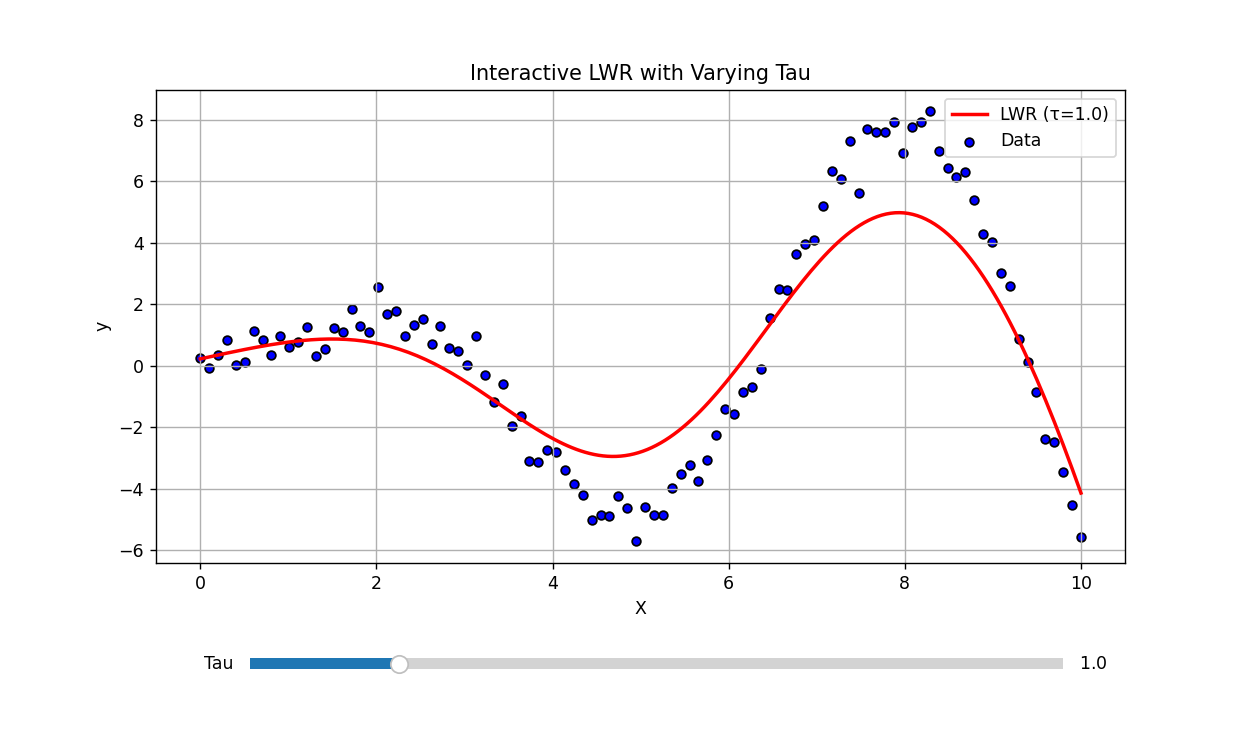

In [25]:
# 2. Interactive Tau Slider
plt.ion()  # Turn on interactive mode
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(bottom=0.25)

x_pred = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
initial_tau = 1.0
y_pred = [lwr(xp, X, y, initial_tau) for xp in x_pred]

l, = plt.plot(x_pred, y_pred, label=f'LWR (τ={initial_tau:.1f})', c='red', linewidth=2)
p = ax.scatter(X, y, label='Data', c='blue', s=25, edgecolors='k')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Interactive LWR with Varying Tau')
ax.legend()
ax.grid(True)

# Slider
ax_tau = plt.axes([0.2, 0.1, 0.65, 0.03])
tau_slider = Slider(ax=ax_tau, label='Tau', valmin=0.1, valmax=5, valinit=initial_tau)

# Update function
def update(val):
    current_tau = tau_slider.val
    new_y_pred = [lwr(xp, X, y, current_tau) for xp in x_pred]
    l.set_ydata(new_y_pred)
    l.set_label(f'LWR (τ={current_tau:.1f})')
    fig.canvas.draw_idle()
    plt.draw()  # Force a redraw

tau_slider.on_changed(update)

plt.ioff()
plt.show()